In [1]:
# This notebook contains the benchmark model 
# For the pedestrian detection 

In [1]:
import cv2
import imutils
from imutils import paths
from imutils.object_detection import non_max_suppression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

(420, 459, 3)


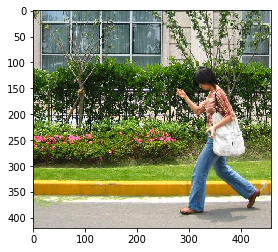

In [3]:
# get an image to test
from DataClass import PennFudanDataset
root = './data/PennFudanPed'
data = PennFudanDataset(root, transforms=None)

# display the selected image
img_number = 10
imagePath = data[img_number]['img_path']

# load the image and resize it to (1) reduce detection time
# and (2) improve detection accuracy
image = cv2.imread(imagePath)
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# resize since the detector works better on low resolution imagas (and inference is faster)
#image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()
print(image.shape)
plt.imshow(image)


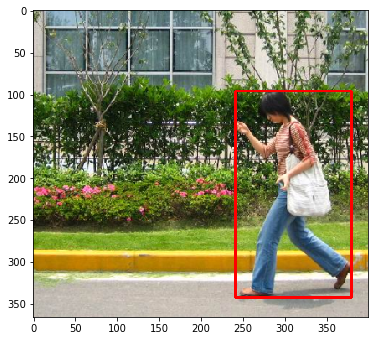

In [4]:
from helpers import display_bounding_box
display_bounding_box(image,data[img_number]['target']['boxes'].numpy(),resize=(400,0))

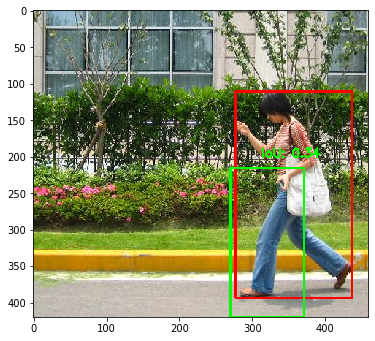

In [5]:
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.05)
    
# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

from helpers import eval_pred
iou = eval_pred(image=image,truthBoxes=data[img_number]['target']['boxes'].numpy(),predBoxes=pick)

In [6]:
iou

[(0.34188552596995614, array([270, 216, 371, 419]))]